In [152]:
import numpy as np
import matplotlib.pyplot as plt
from math import floor, log10

In [71]:
dt = np.load('convergence_report.npy', allow_pickle = True).item()
dt

{'V': array([[1.        , 1.        , 1.0130555 , 1.00872873],
        [1.        , 1.        , 1.0130555 , 1.00872873],
        [1.        , 1.        , 1.01081346, 1.00678439],
        [1.        , 1.        , 1.01080821, 1.00677987]]),
 'theta': array([[0.        , 0.11783757, 0.05783757, 0.03      ],
        [0.        , 0.11783757, 0.05783757, 0.03      ],
        [0.        , 0.11644307, 0.05704869, 0.0296969 ],
        [0.        , 0.11643968, 0.05704632, 0.02969641]]),
 'Pcalc': array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          0.00000000e+00],
        [-2.01715486e+00,  4.04979110e+00,  4.05501207e-02,
         -2.06577299e+00],
        [-1.99293210e+00,  4.00008962e+00,  2.26927593e-04,
         -2.00027329e+00],
        [-1.99288991e+00,  4.00000000e+00,  2.40796272e-09,
         -2.00000000e+00]]),
 'Qcalc': array([[ 0.00000000e+00,  0.00000000e+00, -1.20000000e+00,
         -1.20000000e+00],
        [-5.51655950e-01, -7.48836421e-01,  1.91511411e-01,
   

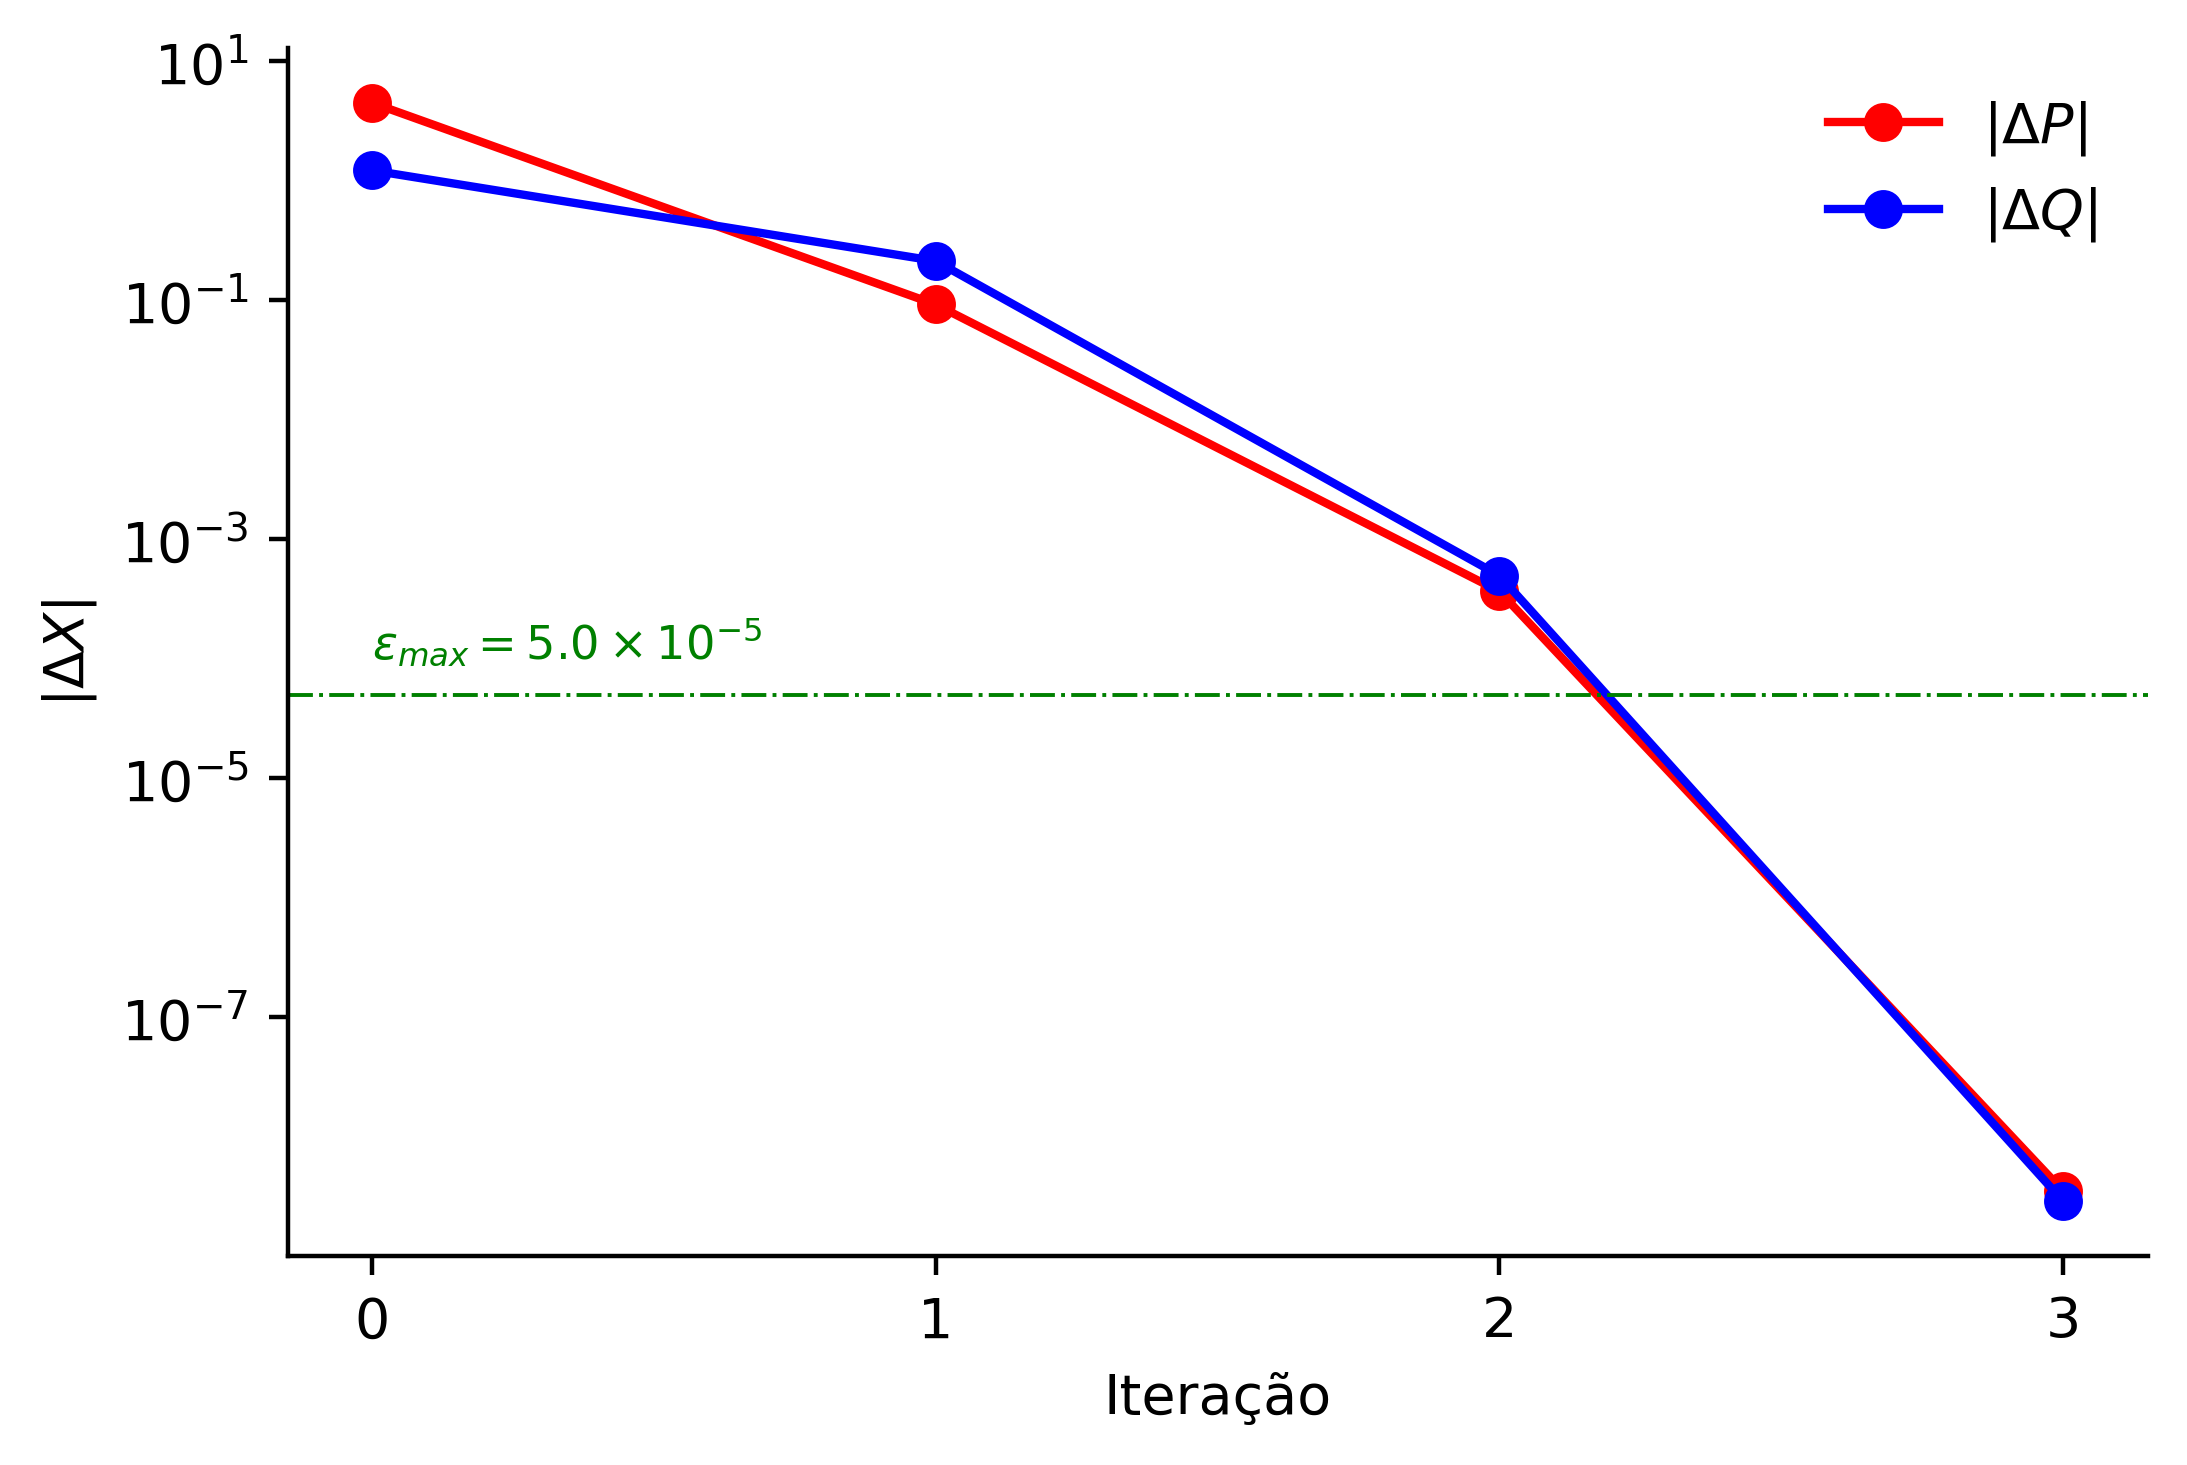

In [183]:
#dp and dq

dpi = 400
fig, ax = plt.subplots(dpi = dpi)
al = 1
color = ['blue','red', 'darkgreen', 'orange',]
list_name = ['$|\Delta P|$', '$|\Delta Q|$']

dP = np.linalg.norm(dt['dP'], axis = 1)
dQ = np.linalg.norm(dt['dQ'], axis = 1)
x = np.arange(0, dt['dP'].shape[0])

ax.plot(x, dP, color = 'red', alpha = al, label = list_name[0], marker = 'o')
ax.plot(x, dQ, color = 'blue', alpha = al, label = list_name[1], marker = 'o')

ax.set_yscale('log')
plt.legend(frameon = False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks(np.arange(0, dt['dQ'].shape[0]))
plt.xlabel('Iteração')
plt.ylabel('$|\Delta X|$')

ax.axhline(dt['error'], ls = '-.', color = 'green', alpha = 1, lw = .7)
exp = floor(np.log10(dt['error']))
base = dt['error']*10**(-exp)
ax.text(0, dt['error'] + 0.5e-4, '$\epsilon_{max} = %.1f\\times10^{%i}$' %(base, exp), color = 'green', size = 'small')
plt.savefig('deltaPQ.png')


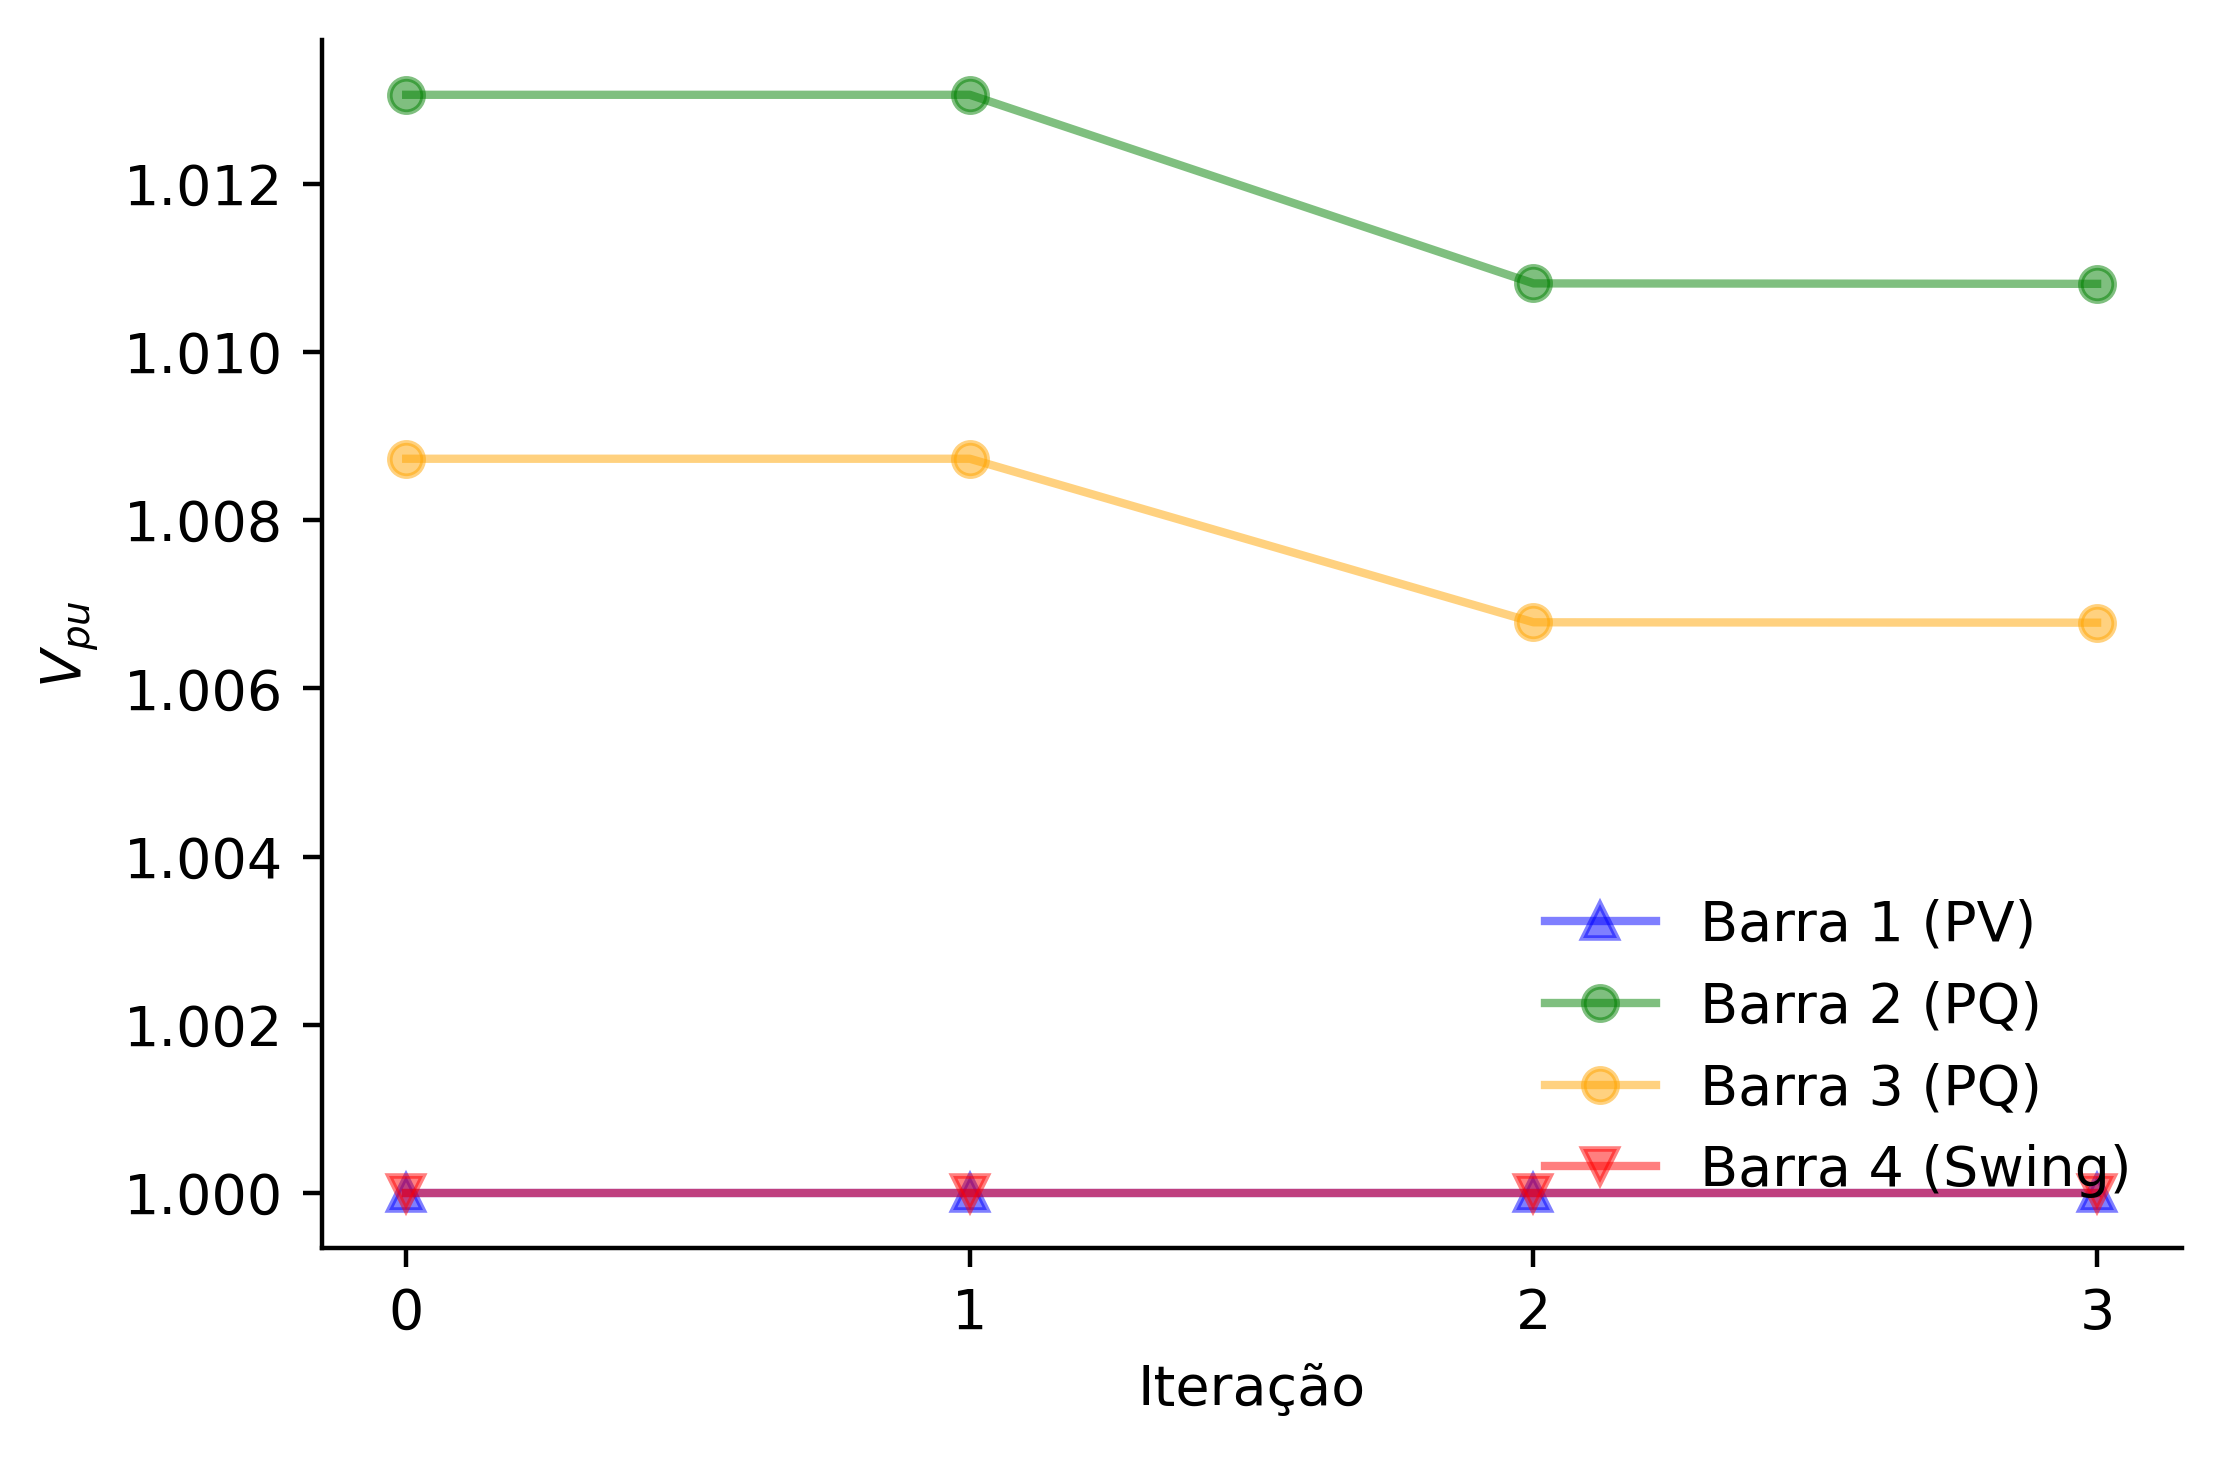

In [189]:
#V

dpi = 400
fig, ax = plt.subplots(dpi = dpi)
al = .5
color = ['blue','red', 'darkgreen', 'orange',]
list_name = ['Swing', '$PV_1$', '$PQ_1$', '$PQ_2$']
list_name = ['Barra 4 (Swing)', 'Barra 1 (PV)', 'Barra 2 (PQ)', 'Barra 3 (PQ)']

V = np.transpose(dt['V'])
x = np.arange(0, dt['V'].shape[0])


ax.plot(x, V[1], color = 'blue', alpha = al, label = list_name[1], marker = '^')
ax.plot(x, V[2], color = 'green', alpha = al, label = list_name[2], marker = 'o')
ax.plot(x, V[3], color = 'orange', alpha = al, label = list_name[3], marker = 'o')
ax.plot(x, V[0], color = 'red', alpha = al, label = list_name[0], marker = 'v') #Swing

plt.legend(loc = 'lower right', frameon = False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks(np.arange(0, dt['dQ'].shape[0]))
plt.xlabel('Iteração')
plt.ylabel('$V_{pu}$')
plt.savefig('V.png')

#ax.axhline(dt['error'], ls = '-.', color = 'green', alpha = 1, lw = .7)
#exp = floor(np.log10(dt['error']))
#base = dt['error']*10**(-exp)
#ax.text(0, dt['error'] + 0.5e-4, '$\epsilon_{max} = %.1f\\times10^{%i}$' %(base, exp), color = 'green', size = 'small')


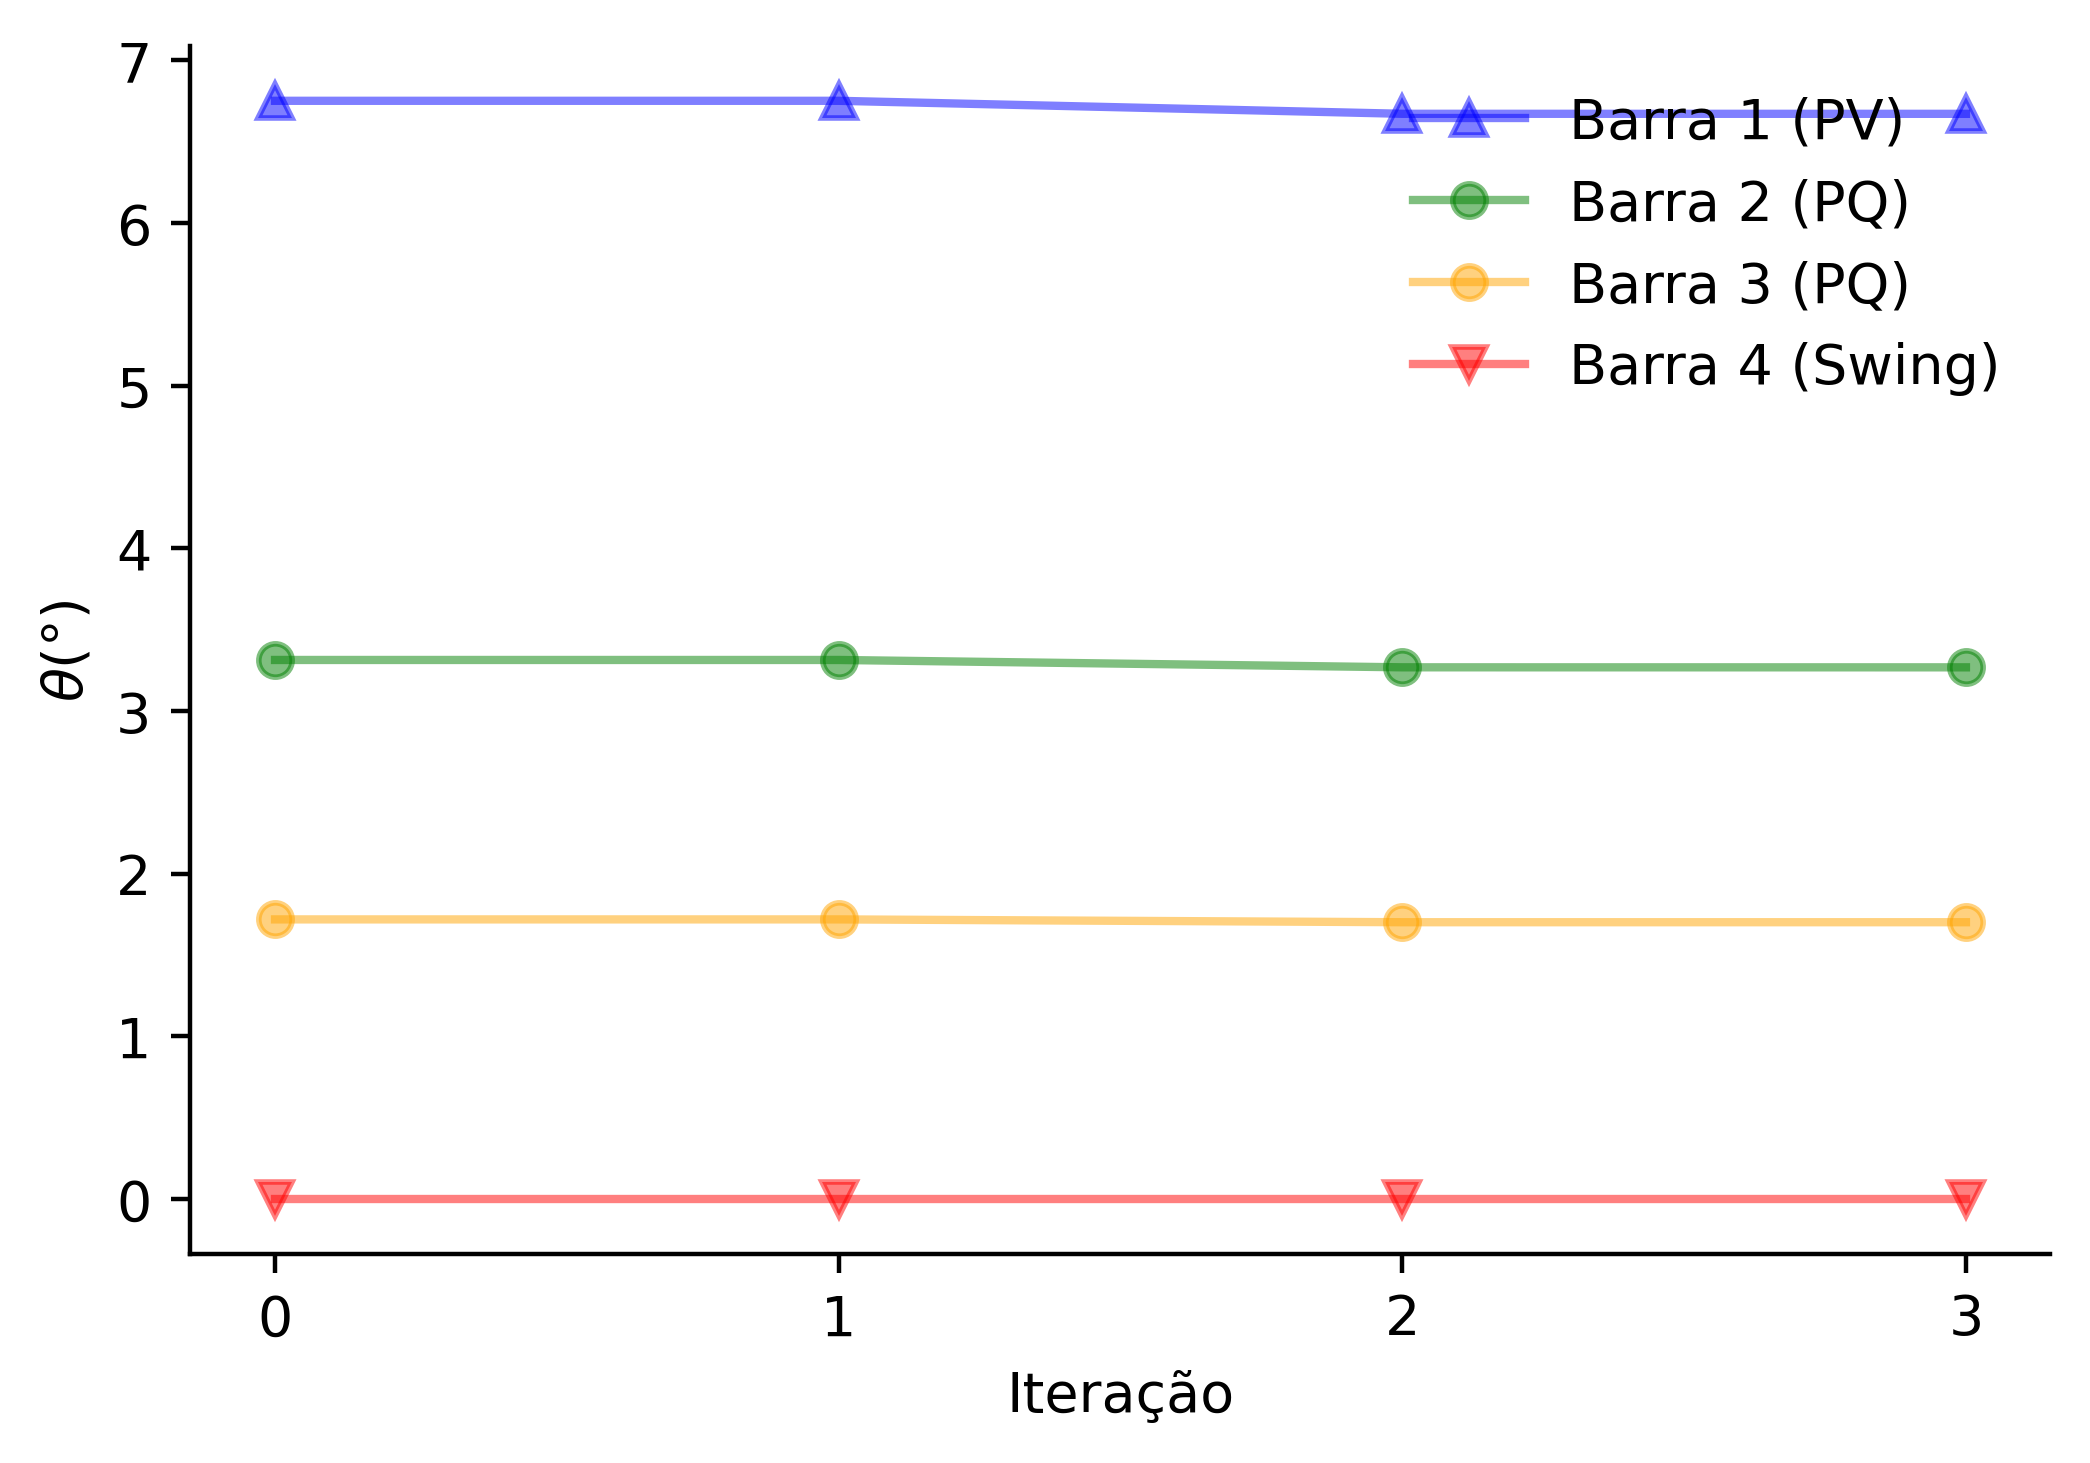

In [190]:
#theta

dpi = 400
fig, ax = plt.subplots(dpi = dpi)
al = .5
color = ['blue','red', 'darkgreen', 'orange',]
list_name = ['Swing', '$PV_1$', '$PQ_1$', '$PQ_2$']
list_name = ['Barra 4 (Swing)', 'Barra 1 (PV)', 'Barra 2 (PQ)', 'Barra 3 (PQ)']


V = 180*np.transpose(dt['theta'])/np.pi
x = np.arange(0, dt['theta'].shape[0])


ax.plot(x, V[1], color = 'blue', alpha = al, label = list_name[1], marker = '^')
ax.plot(x, V[2], color = 'green', alpha = al, label = list_name[2], marker = 'o')
ax.plot(x, V[3], color = 'orange', alpha = al, label = list_name[3], marker = 'o')
ax.plot(x, V[0], color = 'red', alpha = al, label = list_name[0], marker = 'v') #Swing

plt.legend(loc = 'upper right', frameon = False)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
#ax.spines['left'].set_smart_bounds(True)
#ax.spines['bottom'].set_smart_bounds(True)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xticks(np.arange(0, dt['dQ'].shape[0]))
plt.xlabel('Iteração')
plt.ylabel('$\\theta (°)$')

plt.savefig('theta.png')